# MELI 2020

# DATA

In [1]:
import os
import warnings
import json
warnings.filterwarnings('ignore')
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/domain_clf_data.csv")

In [3]:
data.shape

(675954, 2)

In [4]:
data[data["title_clean"].isna()].dropna()

,title_clean,domain_id


In [5]:
pd.options.display.max_columns=100

In [6]:
from tqdm import tqdm
from joblib import Parallel, delayed
import multiprocessing

In [7]:
import texthero as hero

In [8]:
%matplotlib inline

In [9]:
meli_train = pd.read_json('data/train_dataset.jl', lines=True)
meli_item  = pd.read_json('data/item_data.jl',lines=True)

In [10]:
meli_item["item_id"].nunique()

2102277

# SHAPE

In [11]:
meli_train.shape

(413163, 2)

In [12]:
meli_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413163 entries, 0 to 413162
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_history  413163 non-null  object
 1   item_bought   413163 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ MB


In [13]:
meli_train.head()

,user_history,item_bought
0,"[{'event_info': 1786148, 'event_timestamp': '2...",1748830
1,"[{'event_info': 643652, 'event_timestamp': '20...",228737
2,"[{'event_info': 248595, 'event_timestamp': '20...",1909110
3,"[{'event_info': 'RADIOBOSS', 'event_timestamp'...",1197370
4,"[{'event_info': 'AMAZFIT BIP', 'event_timestam...",2049207


In [14]:
meli_train["item_bought"].nunique()

64928

In [15]:
meli_train["item_bought"].value_counts()

1587422    558
1803710    384
10243      371
548905     348
1906937    344
          ... 
1509539      1
1585314      1
2076852      1
1044668      1
445529       1
Name: item_bought, Length: 64928, dtype: int64

In [16]:
meli_train["user_history"][0]

[{'event_info': 1786148,
  'event_timestamp': '2019-10-19T11:25:42.444-0400',
  'event_type': 'view'},
 {'event_info': 1786148,
  'event_timestamp': '2019-10-19T11:25:57.487-0400',
  'event_type': 'view'},
 {'event_info': 'RELOGIO SMARTWATCH',
  'event_timestamp': '2019-10-19T11:26:07.063-0400',
  'event_type': 'search'},
 {'event_info': 1615991,
  'event_timestamp': '2019-10-19T11:27:26.879-0400',
  'event_type': 'view'},
 {'event_info': 1615991,
  'event_timestamp': '2019-10-19T11:28:36.558-0400',
  'event_type': 'view'},
 {'event_info': 1615991,
  'event_timestamp': '2019-10-19T11:28:40.827-0400',
  'event_type': 'view'},
 {'event_info': 1615991,
  'event_timestamp': '2019-10-19T11:30:42.089-0400',
  'event_type': 'view'},
 {'event_info': 1615991,
  'event_timestamp': '2019-10-19T21:51:29.622-0400',
  'event_type': 'view'},
 {'event_info': 1615991,
  'event_timestamp': '2019-10-19T21:52:09.281-0400',
  'event_type': 'view'},
 {'event_info': 1615991,
  'event_timestamp': '2019-10-19T

In [17]:
meli_item.shape

(2102277, 7)

In [18]:
meli_item.head()

,item_id,title,domain_id,product_id,price,category_id,condition
0,111260,Casa Sola En Venta Con Gran Patio Solo Pago De...,MLM-INDIVIDUAL_HOUSES_FOR_SALE,NaN,1150000.00,MLM170527,new
1,871377,Resident Evil Origins Collection Nintendo Swit...,MLM-VIDEO_GAMES,15270800.0,1392.83,MLM151595,new
2,490232,Falda De Imitación Piel Negra,MLM-SKIRTS,NaN,350.00,MLM7697,new
3,1150706,Powercolor Red Devil Radeon Rx 580 8gb Gddr5,MLM-GRAPHICS_CARDS,NaN,3200.00,MLM9761,used
4,934912,Laptop Hp Nx6320 Core Duo Con Puerto Db9 Windo...,MLM-NOTEBOOKS,NaN,1599.00,MLM1652,used


## JOIN

In [19]:
meli_item["title_clean"]=hero.clean(meli_item["title"])
meli_item[["title","title_clean"]].head(50)

,title,title_clean
0,Casa Sola En Venta Con Gran Patio Solo Pago De...,casa venta patio pago contado
1,Resident Evil Origins Collection Nintendo Swit...,resident evil origins collection nintendo swit...
2,Falda De Imitación Piel Negra,falda imitacion piel negra
3,Powercolor Red Devil Radeon Rx 580 8gb Gddr5,powercolor red devil radeon rx 8gb gddr5
4,Laptop Hp Nx6320 Core Duo Con Puerto Db9 Windo...,laptop hp nx6320 core duo puerto db9 windows
5,Transmisor Fm Sin Hilos Bluetooth Reproductor ...,transmisor fm hilos bluetooth reproductor mp3 co
6,Funda Cartera Caseme 007 2 En 1 Huawei P30 Pro,funda cartera caseme huawei p30 pro
7,Lampara De Techo Tubo Slim Led Base G5 9w Blan...,lampara techo tubo slim led base g5 9w blanco ...
8,"Repisa Organizador Para Cocina, Especieros, T...",repisa organizador cocina especieros toallero
9,"Trío, Balerina, Cosmo, Leopardo/negro/rojo, Ve...",trio balerina cosmo leopardo negro rojo verano...


In [20]:
train = pd.merge(meli_train,meli_item,how="left",left_on=["item_bought"],right_on=["item_id"])

In [21]:
train.head()

,user_history,item_bought,item_id,title,domain_id,product_id,price,category_id,condition,title_clean
0,"[{'event_info': 1786148, 'event_timestamp': '2...",1748830,1748830,Relógio Medidor Inteligente Pulso Freqüência C...,MLB-SMARTWATCHES,NaN,90.00,MLB135384,new,relogio medidor inteligente pulso frequencia c...
1,"[{'event_info': 643652, 'event_timestamp': '20...",228737,228737,Bomba Eletrica Tira Leite Materno Bivolt G-tech,MLB-MILK_EXTRACTORS,9015547.0,169.00,MLB264021,new,bomba eletrica tira leite materno bivolt g tech
2,"[{'event_info': 248595, 'event_timestamp': '20...",1909110,1909110,"Kit Youtuber Tripé 1,20 Microfone Lapela Anel ...",MLB-CELLPHONE_ACCESSORIES,NaN,300.00,MLB5092,new,kit youtuber tripe microfone lapela anel led p...
3,"[{'event_info': 'RADIOBOSS', 'event_timestamp'...",1197370,1197370,Leia A Descrição Por Favor - Maquininha Point ...,MLB-CARD_PAYMENT_TERMINALS,NaN,16.90,MLB277951,new,leia a descricao favor maquininha point mini
4,"[{'event_info': 'AMAZFIT BIP', 'event_timestam...",2049207,2049207,Smartwatch Xiaomi Amazfit Bip Huami A1608 Orig...,MLB-SMARTWATCHES,9070839.0,355.99,MLB135384,new,smartwatch xiaomi amazfit bip huami a1608 orig...


In [22]:
train["title_clean"].value_counts()

xiaomi redmi note mpx dual sim gb space black gb ram        1030
xiaomi redmi note dual sim gb neptune blue gb ram            680
fone ouvido bluetooth xiaomi redmi airdots                   619
celular samsung galaxy a30 dual 64gb 4gb ram a305 azul       559
relogio bluetooth wifi smartwatch a1 camera celular chip     490
                                                            ... 
kit teclado mouse gamer sem fio wireless dpi jogos bmax        1
radio walk talk comunicador baofeng bf t3 alcance 5km          1
pincel maquiagem kabuki cerdasi kit pinceis barato             1
tenis infantil masculino homem aranha com luz                  1
fontes chaveada 50a 12v 600w camera fita som bivolt            1
Name: title_clean, Length: 57583, dtype: int64

In [23]:
train["domain_id"].value_counts()

MLB-CELLPHONES                   25070
MLB-SNEAKERS                     14608
MLB-SUPPLEMENTS                   9562
MLB-HEADPHONES                    9053
MLB-SMARTWATCHES                  7963
                                 ...  
MLB-CAR_GLOVE_BOX_DOORS              1
MLM-BABY_NASAL_ASPIRATORS            1
MLM-AUTOMOTIVE_BUMPER_GRILLES        1
MLM-CONCEALERS                       1
MLM-IRRIGATION_DRIPPERS              1
Name: domain_id, Length: 3214, dtype: int64

In [24]:
train["category_id"].value_counts()

MLB1055      25070
MLB23332     14427
MLB122102     7905
MLB135384     7810
MLB7457       6423
             ...  
MLB271607        1
MLM164781        1
MLB135936        1
MLB271911        1
MLM429101        1
Name: category_id, Length: 4001, dtype: int64

In [25]:
train["condition"].value_counts()

new              412637
used                411
not_specified       115
Name: condition, dtype: int64

In [26]:
train[train["condition"]=="used"]["domain_id"].value_counts()

MLM-UNCLASSIFIED_PRODUCTS                            60
MLB-GAME_CONSOLES                                    49
MLB-CELLPHONES                                       33
MLB-UNCLASSIFIED_PRODUCTS                            27
MLB-GAMEPADS_AND_JOYSTICKS                           25
MLM-VIDEO_GAMES                                      24
MLB-VIDEO_GAMES                                      23
MLB-HARD_DRIVES_AND_SSDS                             17
MLB-WEBCAMS                                          15
MLB-COMPUTER_EQUIPMENT_AND_SPARE_PARTS               14
MLB-SUPPLEMENTS                                      12
MLM-POGS                                             12
MLB-COLLECTIBLE_POSTCARDS                            10
MLB-FOODS_AND_DRINKS                                  8
MLB-WRISTWATCHES                                      8
MLB-LADDERS                                           7
MLM-VIDEO_GAME_PREPAID_CARDS                          6
MLM-GAME_CONSOLES_VIDEO_GAMES_AND_ARCADE_MACHINE

In [27]:
train["user_history"][10]

[{'event_info': 'HARMAN KARDON',
  'event_timestamp': '2019-10-26T11:59:00.194-0400',
  'event_type': 'search'},
 {'event_info': 658101,
  'event_timestamp': '2019-10-26T11:59:12.509-0400',
  'event_type': 'view'},
 {'event_info': 'HARMAN KARDON',
  'event_timestamp': '2019-10-26T11:59:25.731-0400',
  'event_type': 'search'},
 {'event_info': 'HARMAN KARDON',
  'event_timestamp': '2019-10-26T11:59:38.963-0400',
  'event_type': 'search'},
 {'event_info': 'HARMAN KARDON',
  'event_timestamp': '2019-10-26T11:59:50.750-0400',
  'event_type': 'search'},
 {'event_info': 'MEMORIA DDR4',
  'event_timestamp': '2019-10-26T19:55:23.776-0400',
  'event_type': 'search'},
 {'event_info': 'MEMORIA DDR4 NOTEBOOK',
  'event_timestamp': '2019-10-26T19:55:38.581-0400',
  'event_type': 'search'},
 {'event_info': 'MEMORIA DDR4 NOTEBOOK',
  'event_timestamp': '2019-10-26T19:56:15.826-0400',
  'event_type': 'search'},
 {'event_info': 'MEMORIA DDR4 NOTEBOOK',
  'event_timestamp': '2019-10-26T19:57:18.413-0400'

In [28]:
pd.DataFrame(train["user_history"][10])

,event_info,event_timestamp,event_type
0,HARMAN KARDON,2019-10-26T11:59:00.194-0400,search
1,658101,2019-10-26T11:59:12.509-0400,view
2,HARMAN KARDON,2019-10-26T11:59:25.731-0400,search
3,HARMAN KARDON,2019-10-26T11:59:38.963-0400,search
4,HARMAN KARDON,2019-10-26T11:59:50.750-0400,search
5,MEMORIA DDR4,2019-10-26T19:55:23.776-0400,search
6,MEMORIA DDR4 NOTEBOOK,2019-10-26T19:55:38.581-0400,search
7,MEMORIA DDR4 NOTEBOOK,2019-10-26T19:56:15.826-0400,search
8,MEMORIA DDR4 NOTEBOOK,2019-10-26T19:57:18.413-0400,search


In [29]:
meli_item[meli_item["title"].str.contains("Harman Kardon")]

,item_id,title,domain_id,product_id,price,category_id,condition,title_clean
4149,662449,Harman Kardon Invoke / Microsoft Cortana Bluet...,MLM-SPEAKERS,NaN,2400.00,MLM2868,new,harman kardon invoke microsoft cortana bluetoo...
11470,2053675,Teatro En Casa Harman Kardon Hts15 Con Amplifi...,MLM-HOME_THEATERS,NaN,26000.00,MLM5845,new,teatro casa harman kardon hts15 amplificador a...
13201,1148212,Harman Kardon Aura Studio2 - Altavoz Inalámbri...,MLM-SPEAKERS,8981710.0,6430.87,MLM59800,new,harman kardon aura studio2 altavoz inalambrico...
20695,1495967,Bocina Harman Kardon Onyx Studio 5 Bluetooth 8...,MLM-SPEAKERS,15106220.0,4999.00,MLM59800,new,bocina harman kardon onyx studio bluetooth
23979,542195,Bocinas Harman Kardon Soundsticks Ii,MLM-SPEAKERS,NaN,3000.00,MLM2868,used,bocinas harman kardon soundsticks ii
...,...,...,...,...,...,...,...,...
2029097,1235592,Caixa Som Harman Kardon Onyx Studio 5 50w Preto,MLB-UNCLASSIFIED_PRODUCTS,NaN,795.99,MLB3530,not_specified,caixa som harman kardon onyx studio 50w preto
2036367,705542,Home Theater Harman Kardon Avr130 Usado,MLB-AV_RECEIVERS,9140360.0,690.00,MLB11509,used,home theater harman kardon avr130 usado
2038552,658101,Caixa De Som Onix 3 60rms Bluetooth - Harman K...,MLB-SPEAKERS,NaN,899.00,MLB3843,new,caixa som onix 60rms bluetooth harman kardon
2056221,767334,Bateria Recarregável Para Caixa De Som Harman ...,MLB-SPEAKERS,NaN,279.00,MLB3843,new,bateria recarregavel caixa som harman kardon onyx


In [30]:
train.drop(columns=["item_id","product_id","condition","category_id"],inplace=True)

In [31]:
train

,user_history,item_bought,title,domain_id,price,title_clean
0,"[{'event_info': 1786148, 'event_timestamp': '2...",1748830,Relógio Medidor Inteligente Pulso Freqüência C...,MLB-SMARTWATCHES,90.00,relogio medidor inteligente pulso frequencia c...
1,"[{'event_info': 643652, 'event_timestamp': '20...",228737,Bomba Eletrica Tira Leite Materno Bivolt G-tech,MLB-MILK_EXTRACTORS,169.00,bomba eletrica tira leite materno bivolt g tech
2,"[{'event_info': 248595, 'event_timestamp': '20...",1909110,"Kit Youtuber Tripé 1,20 Microfone Lapela Anel ...",MLB-CELLPHONE_ACCESSORIES,300.00,kit youtuber tripe microfone lapela anel led p...
3,"[{'event_info': 'RADIOBOSS', 'event_timestamp'...",1197370,Leia A Descrição Por Favor - Maquininha Point ...,MLB-CARD_PAYMENT_TERMINALS,16.90,leia a descricao favor maquininha point mini
4,"[{'event_info': 'AMAZFIT BIP', 'event_timestam...",2049207,Smartwatch Xiaomi Amazfit Bip Huami A1608 Orig...,MLB-SMARTWATCHES,355.99,smartwatch xiaomi amazfit bip huami a1608 orig...
...,...,...,...,...,...,...
413158,"[{'event_info': 'PC GAMER', 'event_timestamp':...",459697,Audifono Bt 5.0 I12 Manos Libres Inalambrico,MLM-HEADPHONES,249.00,audifono bt i12 manos libres inalambrico
413159,"[{'event_info': 289961, 'event_timestamp': '20...",1845503,Kit Unhas Gel Uv Acrigel Mini Lixa Eletrica Ca...,MLB-GEL_NAIL_KITS,169.57,kit unhas gel uv acrigel mini lixa eletrica ca...
413160,"[{'event_info': 'ALUGUEL BOB CAT', 'event_time...",2022477,Bateria Celular Positivo Twist S430 S430b Bt-s...,MLB-CELLPHONE_BATTERIES,46.88,bateria celular positivo twist s430 s430b bt s...
413161,"[{'event_info': 'XAOMI', 'event_timestamp': '2...",1111021,Capa Anti Queda Xiaomi Redmi Mi 9t/ K20 + Pelí...,MLB-CELLPHONE_COVERS,22.99,capa anti queda xiaomi redmi 9t k20 pelicula 5...


# START

## LEN

In [32]:
train["len_user_history"]=train["user_history"].apply(lambda x:len(x))

In [33]:
def len_search(row):
    log=[]
    for event in row:
        if event["event_type"]=="search":
            log.append(event["event_info"])
    if len(log)==0: return 0
    else: return len(log)

In [34]:
def len_view(row):
    log=[]
    for event in row:
        if event["event_type"]=="view":
            log.append(event["event_info"])
    if len(log)==0: return 0
    else: return len(log)

In [35]:
train["number_search"]=train["user_history"].apply(len_search)
train["number_view"]=train["user_history"].apply(len_view)

In [36]:
train[["len_user_history","number_search","number_view"]].describe(percentiles=np.arange(0.1,1,0.1))

,len_user_history,number_search,number_view
count,413163.000000,413163.000000,413163.000000
mean,29.042209,14.689478,14.352730
std,36.278935,20.457799,19.293081
min,1.000000,0.000000,0.000000
10%,2.000000,0.000000,1.000000
20%,4.000000,1.000000,2.000000
30%,7.000000,2.000000,3.000000
40%,11.000000,4.000000,5.000000
50%,16.000000,7.000000,7.000000
60%,22.000000,11.000000,11.000000


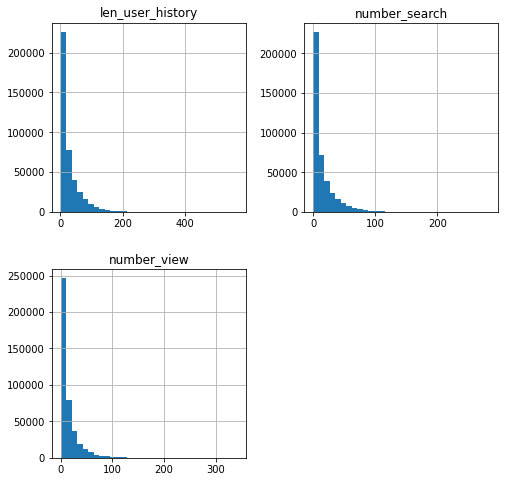

In [37]:
train[["len_user_history","number_search","number_view"]].hist(bins=32,figsize=(8,8));


In [38]:
train[["len_user_history","number_search","number_view"]].corr()

,len_user_history,number_search,number_view
len_user_history,1.000000,0.917868,0.907132
number_search,0.917868,1.000000,0.665600
number_view,0.907132,0.665600,1.000000


In [39]:
train[train["len_user_history"]==1].head()

,user_history,item_bought,title,domain_id,price,title_clean,len_user_history,number_search,number_view
34,"[{'event_info': 1916217, 'event_timestamp': '2...",887130,Spiderman Homem Aranha Mídia Física Lacrado,MLB-VIDEO_GAMES,119.90,spiderman homem aranha midia fisica lacrado,1,0,1
75,"[{'event_info': 87338, 'event_timestamp': '201...",1777682,Adata Disco Duro Solido Ssd Sata Laptop Pc 120...,MLM-HARD_DRIVES_AND_SSDS,489.00,adata disco duro solido ssd sata laptop pc 120...,1,0,1
76,"[{'event_info': 'FIAT UNO VIVACE', 'event_time...",1847644,Relógio Mi Band 4 Xiaomi Versão Global Origina...,MLB-SMARTWATCHES,184.99,relogio band xiaomi versao global original nf ...,1,1,0
91,"[{'event_info': 42654, 'event_timestamp': '201...",671264,Fones De Ouvido Sem Fio Bluetooth I7s Tws,MLB-HEADPHONES,50.00,fones ouvido sem fio bluetooth i7s tws,1,0,1
99,"[{'event_info': 905388, 'event_timestamp': '20...",443165,Kit Fusivel De Lamina 05a 10a 15a 20a 25a 30a ...,MLB-INDUSTRIAL_FUSES,28.90,kit fusivel lamina 05a 10a 15a 20a 25a 30a kit...,1,0,1


In [40]:
train[train["len_user_history"]==1].shape

(31631, 9)

In [41]:
train[train["len_user_history"]==1][["number_search","number_view"]].sum()

number_search     9890
number_view      21741
dtype: int64

In [42]:
train[train["number_view"]==0].head(3)

,user_history,item_bought,title,domain_id,price,title_clean,len_user_history,number_search,number_view
17,"[{'event_info': 'JBL GO 2', 'event_timestamp':...",232,Caixa Bluetooth Jbl Go2 Original Lacrada Vária...,MLB-SPEAKERS,157.90,caixa bluetooth jbl go2 original lacrada cores,2,2,0
28,"[{'event_info': 'COLETE POSTURA FEMININO', 'ev...",1587395,Caixa Som Bluetooth Xtreme Mini Potente 40w Rm...,MLB-SPEAKERS,124.99,caixa som bluetooth xtreme mini potente 40w rm...,3,3,0
63,"[{'event_info': 'CAMISAS MASCULINAS', 'event_t...",1019254,Roteador Tp Link 949n 450mbps 3 Antenas 5dbi F...,MLB-ROUTERS_AND_WIRELESS_SYSTEMS,149.00,roteador tp link 949n 450mbps antenas 5dbi fre...,27,27,0


In [43]:
train[train["len_user_history"]==train["len_user_history"].max()]

,user_history,item_bought,title,domain_id,price,title_clean,len_user_history,number_search,number_view
131539,"[{'event_info': 'DHEA', 'event_timestamp': '20...",1367860,Receita Salada Fit - P/ Dieta! Via E-mail,MLB-FOODS_AND_DRINKS,1.1,receita salada fit p dieta via e mail,566,284,282


In [44]:
train[train["len_user_history"]==train["len_user_history"].max()]["user_history"].iloc[0]

[{'event_info': 'DHEA',
  'event_timestamp': '2019-10-06T15:24:43.848-0400',
  'event_type': 'search'},
 {'event_info': 'DHEA',
  'event_timestamp': '2019-10-06T15:25:17.611-0400',
  'event_type': 'search'},
 {'event_info': 'DHEA',
  'event_timestamp': '2019-10-06T15:25:20.788-0400',
  'event_type': 'search'},
 {'event_info': 'DHEA',
  'event_timestamp': '2019-10-06T15:25:25.083-0400',
  'event_type': 'search'},
 {'event_info': 'DHEA',
  'event_timestamp': '2019-10-06T15:25:33.448-0400',
  'event_type': 'search'},
 {'event_info': 'DHEA',
  'event_timestamp': '2019-10-06T15:25:40.990-0400',
  'event_type': 'search'},
 {'event_info': 1588842,
  'event_timestamp': '2019-10-06T15:26:41.180-0400',
  'event_type': 'view'},
 {'event_info': 1588842,
  'event_timestamp': '2019-10-06T15:27:01.383-0400',
  'event_type': 'view'},
 {'event_info': 'DHEA',
  'event_timestamp': '2019-10-06T15:27:02.410-0400',
  'event_type': 'search'},
 {'event_info': 1193736,
  'event_timestamp': '2019-10-06T15:27:12

## COUNT

In [45]:
count_item_domain = train.groupby(["domain_id","item_bought"])["title"].count().reset_index()
count_item_domain=count_item_domain.rename(columns={"title": "count"})
count_item_domain=count_item_domain.groupby(["domain_id"]).apply(lambda x: x.nlargest(15,['count'])).reset_index(drop=True)

In [46]:
top_sell_domain = {}
for domain in count_item_domain["domain_id"].unique():
    top_sell_domain[domain]=count_item_domain[count_item_domain.domain_id==domain].set_index("item_bought")[["count"]].to_dict()["count"]

1. Get Count Items purchase
2. Get Count Items Views
3. Get Count Items Search

In [47]:
from collections import Counter
from operator import itemgetter
from heapq import nlargest
get_recent = itemgetter("event_timestamp")

In [48]:
def get_count_purchase(row):
    log=[]
    for event in row:
        if "purchases" in event["event_type"].lower():
            log.append(event["event_info"])
    if len(log)==0: return "NONE"
    else: return dict(Counter(log))
    
def get_count_search(row):
    log=[]
    for event in row:
        if event["event_type"]=="search":
            log.append(event["event_info"])
    if len(log)==0: return "NONE"
    else: return dict(Counter(log))

def get_count_view(row):
    log=[]
    for event in row:
        if event["event_type"]=="view":
            log.append(event["event_info"])
    if len(log)==0: return "NONE"
    else: return dict(Counter(log))

In [49]:
train["count_purchase"]=train["user_history"].apply(get_count_purchase)
train["count_view"]=train["user_history"].apply(get_count_view)
train["count_search"]=train["user_history"].apply(get_count_search)

In [50]:
def get_max_view(row):
    if row["number_view"]==0: return np.nan
    log=[]
    for event in row["user_history"]:
        if event["event_type"]=="view":
            log.append(event["event_info"])
    dicc = dict(Counter(log))
    max_view = max(dicc, key=dicc.get)
    if dicc[max_view]==1 and len(dicc.keys())>1:return np.nan
    else:
        return  max_view

In [51]:
train["max_view_item"]=train.apply(get_max_view,axis=1)

In [52]:
# Just one view  - Same item bought ? | or category 
train[(train["len_user_history"]==1)&(train["item_bought"]==train["max_view_item"])].head(3)

,user_history,item_bought,title,domain_id,price,title_clean,len_user_history,number_search,number_view,count_purchase,count_view,count_search,max_view_item
660,"[{'event_info': 496298, 'event_timestamp': '20...",496298,Climatizador Usb Mini Ar Portátil Umidificador...,MLB-PORTABLE_EVAPORATIVE_AIR_COOLERS,79.90,climatizador usb mini ar portatil umidificador...,1,0,1,NONE,{496298: 1},NONE,496298.0
788,"[{'event_info': 1778906, 'event_timestamp': '2...",1778906,Cooktop 2 Bocas Preto Askoi A Gás Glp Superaut...,MLB-COOKTOPS,249.90,cooktop bocas preto askoi a gas glp superautom...,1,0,1,NONE,{1778906: 1},NONE,1778906.0
1130,"[{'event_info': 746966, 'event_timestamp': '20...",746966,Blusa Dama Floral Manga Larga,MLM-BLOUSES,331.37,blusa dama floral manga larga,1,0,1,NONE,{746966: 1},NONE,746966.0


In [53]:
train=pd.merge(train,
               meli_item[["item_id","domain_id","category_id"]].add_prefix("max_view_"),
               left_on=["max_view_item"],
               right_on=["max_view_item_id"],
               how="left").drop("max_view_item_id",axis=1)

In [54]:
meli_item_domain_dict = meli_item.set_index("item_id")["domain_id"].to_dict()

In [55]:
def most_domain_view(row):
    if row["count_view"]=="NONE":return np.nan
    most_view = {}
    for key in row["count_view"].keys():
        doma = meli_item_domain_dict[key]
        if doma not in most_view.keys():
            most_view[doma]=1
        else:
            most_view[doma]=most_view[doma]+1
    dicc = dict(Counter(most_view))
    return max(dicc, key=dicc.get)

In [56]:
train["most_domain_view"]=train.apply(most_domain_view,axis=1)

In [57]:
train.head()

,user_history,item_bought,title,domain_id,price,title_clean,len_user_history,number_search,number_view,count_purchase,count_view,count_search,max_view_item,max_view_domain_id,max_view_category_id,most_domain_view
0,"[{'event_info': 1786148, 'event_timestamp': '2...",1748830,Relógio Medidor Inteligente Pulso Freqüência C...,MLB-SMARTWATCHES,90.00,relogio medidor inteligente pulso frequencia c...,19,1,18,NONE,"{1786148: 2, 1615991: 16}",{'RELOGIO SMARTWATCH': 1},1615991.0,MLB-SMARTWATCHES,MLB135384,MLB-SMARTWATCHES
1,"[{'event_info': 643652, 'event_timestamp': '20...",228737,Bomba Eletrica Tira Leite Materno Bivolt G-tech,MLB-MILK_EXTRACTORS,169.00,bomba eletrica tira leite materno bivolt g tech,13,5,8,NONE,"{643652: 1, 1156086: 1, 1943604: 1, 206667: 1,...",{'DESMAMADEIRA ELETRICA': 5},228737.0,MLB-MILK_EXTRACTORS,MLB264021,MLB-MILK_EXTRACTORS
2,"[{'event_info': 248595, 'event_timestamp': '20...",1909110,"Kit Youtuber Tripé 1,20 Microfone Lapela Anel ...",MLB-CELLPHONE_ACCESSORIES,300.00,kit youtuber tripe microfone lapela anel led p...,2,0,2,NONE,{248595: 2},NONE,248595.0,MLB-TOWEL_SETS,MLB186353,MLB-TOWEL_SETS
3,"[{'event_info': 'RADIOBOSS', 'event_timestamp'...",1197370,Leia A Descrição Por Favor - Maquininha Point ...,MLB-CARD_PAYMENT_TERMINALS,16.90,leia a descricao favor maquininha point mini,13,6,7,NONE,"{505541: 5, 1230082: 1, 937557: 1}","{'RADIOBOSS': 2, 'SOUND FORGE': 1, 'SOUND FORG...",505541.0,MLB-COMPUTER_EQUIPMENT_AND_SPARE_PARTS,MLB1730,MLB-OFFICE_SOFTWARE
4,"[{'event_info': 'AMAZFIT BIP', 'event_timestam...",2049207,Smartwatch Xiaomi Amazfit Bip Huami A1608 Orig...,MLB-SMARTWATCHES,355.99,smartwatch xiaomi amazfit bip huami a1608 orig...,69,23,46,NONE,"{130440: 2, 2049207: 3, 277311: 1, 1476099: 2,...","{'AMAZFIT BIP': 5, 'AMAZFIT BIPAMAZFIT BIP LIT...",1313192.0,MLB-KIDS_TENTS,MLB278224,MLB-KIDS_TENTS


## LAST
1. Get last item view
2. Get last item seach

In [58]:
train.loc[302494]

user_history            [{'event_info': 'ESTUFA SALGADOS', 'event_time...
item_bought                                                       1350706
title                   Call Of Duty Modern Warfare Xbox One Digital N...
domain_id                                                 MLB-VIDEO_GAMES
price                                                                  20
title_clean             call of duty modern warfare xbox one digital n...
len_user_history                                                      105
number_search                                                          47
number_view                                                            58
count_purchase                                                       NONE
count_view              {2074441: 3, 706034: 1, 303889: 4, 2038657: 2,...
count_search            {'ESTUFA SALGADOS': 24, 'FILTRO ALCALINO': 1, ...
max_view_item                                                 1.20032e+06
max_view_domain_id                    

In [59]:
meli_item[meli_item.item_id==1350706]

,item_id,title,domain_id,product_id,price,category_id,condition,title_clean
1092382,1350706,Call Of Duty Modern Warfare Xbox One Digital N...,MLB-VIDEO_GAMES,NaN,20.0,MLB186456,new,call of duty modern warfare xbox one digital n...


In [60]:
train.loc[302494]["user_history"]

[{'event_info': 'ESTUFA SALGADOS',
  'event_timestamp': '2019-10-22T15:02:34.266-0400',
  'event_type': 'search'},
 {'event_info': 'ESTUFA SALGADOS',
  'event_timestamp': '2019-10-22T15:03:07.310-0400',
  'event_type': 'search'},
 {'event_info': 2074441,
  'event_timestamp': '2019-10-22T15:03:17.867-0400',
  'event_type': 'view'},
 {'event_info': 2074441,
  'event_timestamp': '2019-10-22T15:04:14.868-0400',
  'event_type': 'view'},
 {'event_info': 'ESTUFA SALGADOS',
  'event_timestamp': '2019-10-22T15:04:50.655-0400',
  'event_type': 'search'},
 {'event_info': 706034,
  'event_timestamp': '2019-10-22T15:05:01.969-0400',
  'event_type': 'view'},
 {'event_info': 'ESTUFA SALGADOS',
  'event_timestamp': '2019-10-22T15:06:39.604-0400',
  'event_type': 'search'},
 {'event_info': 303889,
  'event_timestamp': '2019-10-22T15:06:52.121-0400',
  'event_type': 'view'},
 {'event_info': 303889,
  'event_timestamp': '2019-10-22T15:08:12.159-0400',
  'event_type': 'view'},
 {'event_info': 'ESTUFA SALG

In [61]:
def get_last_view(row):
    last_list = list(filter(lambda x:x["event_type"]=="view",row))
    if len(last_list)==0: return None
    else: return  max(last_list, key=get_recent)["event_info"]
    
def get_last_search(row):
    last_list = list(filter(lambda x:x["event_type"]=="search",row))
    if len(last_list)==0: return None
    else: return  max(last_list, key=get_recent)["event_info"]

In [62]:
train["last_search"]=train["user_history"].apply(get_last_search)
train["last_view"]=train["user_history"].apply(get_last_view)

In [63]:
train.head(3)

,user_history,item_bought,title,domain_id,price,title_clean,len_user_history,number_search,number_view,count_purchase,count_view,count_search,max_view_item,max_view_domain_id,max_view_category_id,most_domain_view,last_search,last_view
0,"[{'event_info': 1786148, 'event_timestamp': '2...",1748830,Relógio Medidor Inteligente Pulso Freqüência C...,MLB-SMARTWATCHES,90.0,relogio medidor inteligente pulso frequencia c...,19,1,18,NONE,"{1786148: 2, 1615991: 16}",{'RELOGIO SMARTWATCH': 1},1615991.0,MLB-SMARTWATCHES,MLB135384,MLB-SMARTWATCHES,RELOGIO SMARTWATCH,1615991.0
1,"[{'event_info': 643652, 'event_timestamp': '20...",228737,Bomba Eletrica Tira Leite Materno Bivolt G-tech,MLB-MILK_EXTRACTORS,169.0,bomba eletrica tira leite materno bivolt g tech,13,5,8,NONE,"{643652: 1, 1156086: 1, 1943604: 1, 206667: 1,...",{'DESMAMADEIRA ELETRICA': 5},228737.0,MLB-MILK_EXTRACTORS,MLB264021,MLB-MILK_EXTRACTORS,DESMAMADEIRA ELETRICA,228737.0
2,"[{'event_info': 248595, 'event_timestamp': '20...",1909110,"Kit Youtuber Tripé 1,20 Microfone Lapela Anel ...",MLB-CELLPHONE_ACCESSORIES,300.0,kit youtuber tripe microfone lapela anel led p...,2,0,2,NONE,{248595: 2},NONE,248595.0,MLB-TOWEL_SETS,MLB186353,MLB-TOWEL_SETS,None,248595.0


In [64]:
train=pd.merge(train,
               meli_item[["item_id","domain_id"]].add_prefix("last_view_"),
               how="left",
               left_on=["last_view"],
               right_on=["last_view_item_id"]).drop("last_view_item_id",axis=1)

In [65]:
train[train.last_search.isna()]

,user_history,item_bought,title,domain_id,price,title_clean,len_user_history,number_search,number_view,count_purchase,count_view,count_search,max_view_item,max_view_domain_id,max_view_category_id,most_domain_view,last_search,last_view,last_view_domain_id
2,"[{'event_info': 248595, 'event_timestamp': '20...",1909110,"Kit Youtuber Tripé 1,20 Microfone Lapela Anel ...",MLB-CELLPHONE_ACCESSORIES,300.00,kit youtuber tripe microfone lapela anel led p...,2,0,2,NONE,{248595: 2},NONE,248595.0,MLB-TOWEL_SETS,MLB186353,MLB-TOWEL_SETS,None,248595.0,MLB-TOWEL_SETS
13,"[{'event_info': 307861, 'event_timestamp': '20...",673499,Super Banco Imobiliário Maquininha De Cartão -...,MLB-BOARD_GAMES,209.80,super banco imobiliario maquininha cartao novo...,4,0,4,NONE,"{307861: 1, 256337: 1, 1203463: 1, 1396581: 1}",NONE,NaN,NaN,NaN,MLB-ELECTRIC_PRESSURE_WASHERS,None,1396581.0,MLB-MOBILE_DEVICE_CHARGERS
16,"[{'event_info': 876310, 'event_timestamp': '20...",1877560,Escada De Alumínio Usada,MLB-LADDERS,6.44,escada aluminio usada,2,0,2,NONE,"{876310: 1, 601910: 1}",NONE,NaN,NaN,NaN,MLB-LADDERS,None,601910.0,MLB-LADDERS
26,"[{'event_info': 2040755, 'event_timestamp': '2...",1567189,2 Formas Abs P/ Gesso 3d Frete Grátis Para Nor...,MLB-FLOORS_WALLS_AND_APERTURES,150.00,formas abs p gesso 3d frete gratis norte e nor...,24,0,24,NONE,"{2040755: 7, 1798729: 2, 1842698: 3, 1814813: ...",NONE,2040755.0,MLB-IDENTIFICATION_AND_PRESENTATION_CARDS,MLB270310,MLB-IDENTIFICATION_AND_PRESENTATION_CARDS,None,47721.0,MLB-IDENTIFICATION_AND_PRESENTATION_CARDS
34,"[{'event_info': 1916217, 'event_timestamp': '2...",887130,Spiderman Homem Aranha Mídia Física Lacrado,MLB-VIDEO_GAMES,119.90,spiderman homem aranha midia fisica lacrado,1,0,1,NONE,{1916217: 1},NONE,1916217.0,MLB-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLB264788,MLB-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,None,1916217.0,MLB-BEAUTY_AND_PERSONAL_CARE_SUPPLIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413124,"[{'event_info': 1231063, 'event_timestamp': '2...",853020,Mini Micro Camera Monitoramento Espia Seguranç...,MLB-SURVEILLANCE_CAMERAS,89.99,mini micro camera monitoramento espia seguranc...,3,0,3,NONE,"{1231063: 2, 1857941: 1}",NONE,1231063.0,MLB-WOMEN_SWIMWEAR,MLB430391,MLB-WOMEN_SWIMWEAR,None,1231063.0,MLB-WOMEN_SWIMWEAR
413134,"[{'event_info': 1662537, 'event_timestamp': '2...",793889,Vassoura Inteligente 3 Em 1 Original,MLB-HAIRDRESSING_SCISSORS,33.50,vassoura inteligente em original,1,0,1,NONE,{1662537: 1},NONE,1662537.0,MLB-AUTOMOTIVE_MATS,MLB2219,MLB-AUTOMOTIVE_MATS,None,1662537.0,MLB-AUTOMOTIVE_MATS
413140,"[{'event_info': 1132323, 'event_timestamp': '2...",1739875,Par Farol Ecosport 2004 2005 2006 2007 Pisca A...,MLB-AUTOMOTIVE_HEADLIGHTS,273.76,par farol ecosport pisca ambar laranja,8,0,8,NONE,"{1132323: 1, 876212: 1, 991530: 1, 200687: 1, ...",NONE,389939.0,MLB-AUTOMOTIVE_HEADLIGHTS,MLB7863,MLB-AUTOMOTIVE_HEADLIGHTS,None,893108.0,MLB-AUTOMOTIVE_HEADLIGHTS
413145,"[{'event_info': 512484, 'event_timestamp': '20...",512484,Kit 3 Tesouras Profissionais Fio Laser E Desba...,MLB-HAIRDRESSING_SCISSORS,169.99,kit tesouras profissionais fio laser e desbast...,1,0,1,NONE,{512484: 1},NONE,512484.0,MLB-HAIRDRESSING_SCISSORS,MLB169505,MLB-HAIRDRESSING_SCISSORS,None,512484.0,MLB-HAIRDRESSING_SCISSORS


# SEARCH domain_id

### ML

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import TruncatedSVD

In [67]:
from sklearn.metrics import balanced_accuracy_score

In [68]:
domain_in_train=train["domain_id"].value_counts().loc[lambda x:x>30].index

In [69]:
domain_keep = meli_item["domain_id"].value_counts().loc[lambda x:x>30].index

In [70]:
meli_item[meli_item["domain_id"].isin(domain_keep)&meli_item["domain_id"].isin(domain_in_train)].shape

(1539557, 8)

In [80]:
meli_item

,item_id,title,domain_id,product_id,price,category_id,condition,title_clean
0,111260,Casa Sola En Venta Con Gran Patio Solo Pago De...,MLM-INDIVIDUAL_HOUSES_FOR_SALE,NaN,1150000.00,MLM170527,new,casa venta patio pago contado
1,871377,Resident Evil Origins Collection Nintendo Swit...,MLM-VIDEO_GAMES,15270800.0,1392.83,MLM151595,new,resident evil origins collection nintendo swit...
2,490232,Falda De Imitación Piel Negra,MLM-SKIRTS,NaN,350.00,MLM7697,new,falda imitacion piel negra
3,1150706,Powercolor Red Devil Radeon Rx 580 8gb Gddr5,MLM-GRAPHICS_CARDS,NaN,3200.00,MLM9761,used,powercolor red devil radeon rx 8gb gddr5
4,934912,Laptop Hp Nx6320 Core Duo Con Puerto Db9 Windo...,MLM-NOTEBOOKS,NaN,1599.00,MLM1652,used,laptop hp nx6320 core duo puerto db9 windows
...,...,...,...,...,...,...,...,...
2102272,1099649,Carrinho De Bebê Stoke,MLB-BABY_STROLLERS,NaN,1600.00,MLB1386,used,carrinho bebe stoke
2102273,1482187,Grelha Para Hambúrguer Preta Com Cabo Em Madei...,MLB-KITCHEN_SUPPLIES,NaN,69.90,MLB193425,new,grelha hamburguer preta com cabo em madeira prana
2102274,1118904,Meia Tam 7/8 Anti Embolia Trombose Antitrombo,MLB-SOCKS,NaN,118.00,MLB108791,new,meia tam anti embolia trombose antitrombo
2102275,237229,Pano De Boca Cremer Menina Luxo Bordado C/3 Und,MLB-DISPOSABLE_BABY_DIAPERS,NaN,26.90,MLB40629,new,pano boca cremer menina luxo bordado c und


In [74]:
X = meli_item[meli_item["domain_id"].isin(domain_keep)&meli_item["domain_id"].isin(domain_in_train)]["title_clean"]
y = meli_item[meli_item["domain_id"].isin(domain_keep)&meli_item["domain_id"].isin(domain_in_train)]["domain_id"]

In [73]:
sampling={}
counts  = y.value_counts()
for cat in counts.index:
    if counts.loc[cat]>2500:
        sampling[cat]=2500
    else:
        sampling[cat]=counts.loc[cat]

In [74]:
rus = RandomUnderSampler(sampling_strategy=sampling,random_state=42)
X_res, y_res = rus.fit_resample(X.values.reshape(-1, 1), y)

In [75]:
X_res=pd.DataFrame(X_res)
X_res.columns=['title_clean']
X_res['title_clean']=X_res['title_clean'].astype('str')
y_res=pd.Series(y_res)

In [76]:
pd.concat([X_res,y_res],axis=1).to_csv("data/domain_clf_data_2.csv",index=False)

In [74]:
# LOAD TRAIN MODEL

In [71]:
from joblib import dump, load

In [72]:
os.listdir("models/")

['HashOneVsRestClassifier_LogisticRegression.joblib',
 'HashOneVsRestClassifier_SGDClassifier.joblib',
 'LogisticRegression.joblib',
 'LogisticRegression_80.joblib',
 'LogisticRegression_80_balanced.joblib',
 'OneVsRestClassifier_LogisticRegression.joblib',
 'SGDClassifier.joblib']

In [166]:
def model_accuracy(model):
    y_pred = np.empty(0)
    for i in range(0,X.shape[0],100000):
        pred = model.predict(X[i:i+100000])
        y_pred = np.concatenate((y_pred,pred))
        
    print("balanced_accuracy_score: ",balanced_accuracy_score(y, y_pred))

In [168]:
for sva_model in os.listdir("models/"):
    clf = load("models/"+sva_model)
    print(sva_model)
    model_accuracy(clf)

HashOneVsRestClassifier_LogisticRegression.joblib
balanced_accuracy_score:  0.0008658008658008658
HashOneVsRestClassifier_SGDClassifier.joblib
balanced_accuracy_score:  0.0008658008658008658
LogisticRegression.joblib
balanced_accuracy_score:  0.7820228426164648
LogisticRegression_80.joblib
balanced_accuracy_score:  0.6781238955798335
LogisticRegression_80_balanced.joblib
balanced_accuracy_score:  0.8528378461930182
OneVsRestClassifier_LogisticRegression.joblib
balanced_accuracy_score:  0.8072918109654452
SGDClassifier.joblib
balanced_accuracy_score:  0.7793576334628878


In [73]:
model = load("models/LogisticRegression_80_balanced.joblib")

In [75]:
y_pred = np.empty(0)
for i in range(0,X.shape[0],100000):
    pred = model.predict(X[i:i+100000])
    y_pred = np.concatenate((y_pred,pred))
print("balanced_accuracy_score: ",balanced_accuracy_score(y, y_pred))

balanced_accuracy_score:  0.8528378461930182


In [77]:
X_pred=pd.DataFrame(X)

In [81]:
X_pred["real"]=y
X_pred["pred"]=y_pred

In [85]:
X_pred[X_pred["real"]!=X_pred["pred"]].sample(10)

,title_clean,real,pred
1081786,botinha academia feminino treino fitness couro...,MLB-SNEAKERS,MLB-GYM_GLOVES
1077800,adaptador extensao bocado broca titular chave f,MLB-TOOLS,MLB-DRILL_BITS
1916277,relicario com corrente duas fotos cor prata co...,MLB-SOUVENIRS,MLB-NECKLACES
1351294,pes2018 midia digtal xbox360,MLB-GAME_CONSOLES_VIDEO_GAMES_AND_ARCADE_MACHINES,MLB-VIDEO_GAMES
706295,bike piscina,MLB-STATIONARY_BICYCLES,MLB-FRAME_POOLS
1390722,coroa girassois amarelo luxo,MLB-PARTY_SUPPLIES,MLB-JEWELRY
805058,induzido 127v skil furadeira f000605104 original,MLB-TOOL_ACCESSORIES_AND_SPARES,MLB-ELECTRIC_DRILLS
729513,kit litros litros panela e pressao l,MLB-KITCHEN_COOKWARE_SETS,MLB-KITCHEN_POTS
1860269,hialuronico puro super hidratante pele seca,MLB-FACIAL_SKIN_CARE_PRODUCTS,MLB-BODY_SKIN_CARE_PRODUCTS
1761455,vermifugo ouro fino top dog caes ate kg comp,MLB-ANIMAL_AND_PET_PRODUCTS,MLB-DOG_SUPPLEMENTS


In [86]:
train["last_search"].dropna()

0                  RELOGIO SMARTWATCH
1               DESMAMADEIRA ELETRICA
3                 SOUND FORGE PLUGINS
4                         GALAXY BUDS
5                    CAMBIO C4 PALLAS
                     ...             
413158             CELULAR LANIX X510
413159              PINCEIS MAQUIAGEM
413160    ALUGUEL BOB CAT ESCAVADEIRA
413161                          XAOMI
413162                  COTONETE FINO
Name: last_search, Length: 340636, dtype: object

In [87]:
pred_search = pd.DataFrame(train["last_search"].dropna())

In [88]:
y_pred_search=model.predict(train["last_search"].dropna())

In [89]:
pred_search["pred_search"]=y_pred_search

In [90]:
train=train.merge(pred_search[["pred_search"]],how="left",left_index=True,right_index=True)

In [91]:
y_domain=train[["domain_id","pred_search"]].dropna()["domain_id"]
y_domain_search=train[["domain_id","pred_search"]].dropna()["pred_search"]

In [92]:
balanced_accuracy_score(y_domain, y_domain_search)

0.08288378633611909

In [93]:
train[train["domain_id"]==train["pred_search"]][["title","domain_id","last_search","pred_search"]]

,title,domain_id,last_search,pred_search
0,Relógio Medidor Inteligente Pulso Freqüência C...,MLB-SMARTWATCHES,RELOGIO SMARTWATCH,MLB-SMARTWATCHES
1,Bomba Eletrica Tira Leite Materno Bivolt G-tech,MLB-MILK_EXTRACTORS,DESMAMADEIRA ELETRICA,MLB-MILK_EXTRACTORS
9,Kit Completo Ring Light Com Tripé Dimmer Youtu...,MLB-CONTINUOUS_LIGHTING,ILUMINADOR LED RING LIGHT MAQUIAGEM MAKE FOTOS,MLB-CONTINUOUS_LIGHTING
15,Licença Windows 10 Home Ou Pro Ativação Origin...,MLB-OPERATING_SYSTEMS,LICENCA WINDOWS 10,MLB-OPERATING_SYSTEMS
17,Caixa Bluetooth Jbl Go2 Original Lacrada Vária...,MLB-SPEAKERS,JBL GO 2,MLB-SPEAKERS
...,...,...,...,...
413138,"Hd Ssd 240gb Sata 3 Kingston A400 2,5 Novo La...",MLB-HARD_DRIVES_AND_SSDS,HD INTERNO,MLB-HARD_DRIVES_AND_SSDS
413142,Kit Reposição De Vareta Da Barraca Iglu 3 Pess...,MLB-TENTS,VARETA BARRACA,MLB-TENTS
413152,Boneco Luccas Neto Original Baby Brink,MLB-ACTION_FIGURES,BONECO LUCCA NETO,MLB-ACTION_FIGURES
413153,Chuteira Cr7 Infantil Futsal Quadra Lançamento...,MLB-FOOTBALL_SHOES,CHUTEIRA CR7 INFANTIL LARANJA CAMPO,MLB-FOOTBALL_SHOES
